In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sms

In [2]:
df = pd.read_csv(r'C:\Users\Yash\Downloads\airline_passengers.csv', header = 0)

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


<AxesSubplot: >

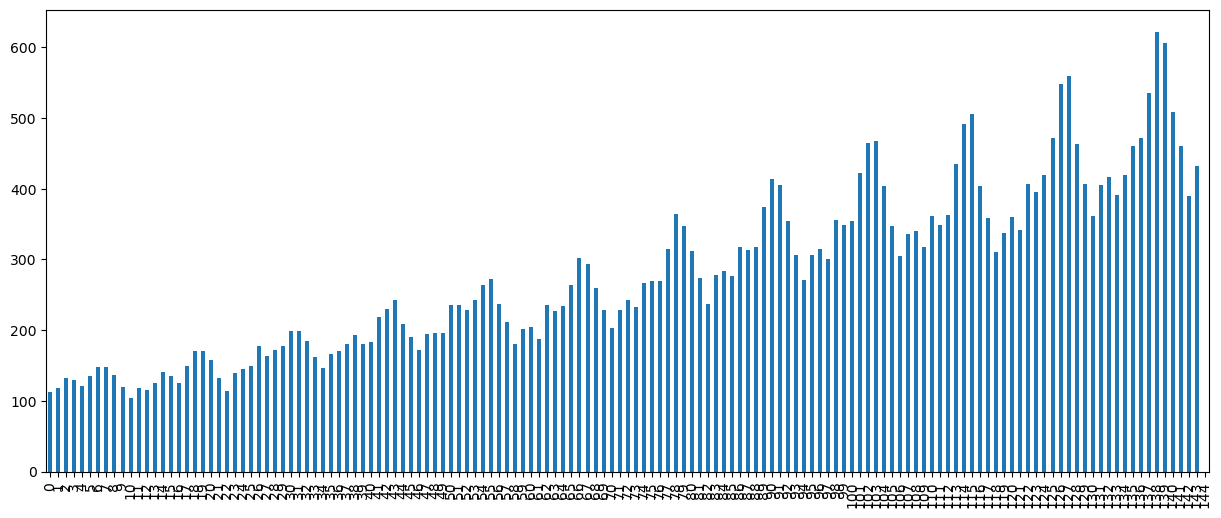

In [4]:
df['Thousands of Passengers'].plot(kind = 'bar', figsize = (15,6))

In [6]:
df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [7]:
df.dropna(axis = 0, inplace = True)

In [8]:
df.isna().sum()


Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df.set_index('Month', inplace = True)

In [14]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot: xlabel='Month'>

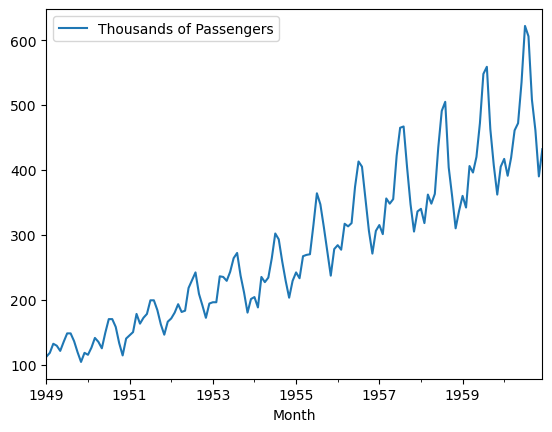

In [15]:
df.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result = adfuller(series)
    print ('ADF Statistics : {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <=  0.05:
        print("Strong evidence against the null Hypo, data is stationary")
    else :
        print('Data is not stationary')

In [18]:
adf_test(df['Thousands of Passengers'])

ADF Statistics : 0.8153688792060512
p-value: 0.991880243437641
Data is not stationary


In [19]:
df['Difference_1'] = df['Thousands of Passengers']- df['Thousands of Passengers'].shift(1)

In [20]:
df.head(10)

,Thousands of Passengers,Difference_1
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
1949-06-01,135.0,14.0
1949-07-01,148.0,13.0
1949-08-01,148.0,0.0
1949-09-01,136.0,-12.0


In [21]:
adf_test(df['Difference_1'].dropna())

ADF Statistics : -2.829266824169998
p-value: 0.054213290283825676
Data is not stationary


In [23]:
df['Difference_2'] = df['Difference_1']- df['Difference_1'].shift(1)

In [24]:
df.head(10)

,Thousands of Passengers,Difference_1,Difference_2
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
1949-06-01,135.0,14.0,22.0
1949-07-01,148.0,13.0,-1.0
1949-08-01,148.0,0.0,-13.0
1949-09-01,136.0,-12.0,-12.0


In [25]:
adf_test(df['Difference_2'].dropna())

ADF Statistics : -16.384231542468516
p-value: 2.7328918500141235e-29
Strong evidence against the null Hypo, data is stationary


In [28]:
df['Difference_12'] = df['Thousands of Passengers']- df['Thousands of Passengers'].shift(12)

In [29]:
adf_test(df['Difference_12'].dropna())

ADF Statistics : -3.3830207264924805
p-value: 0.011551493085514982
Strong evidence against the null Hypo, data is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

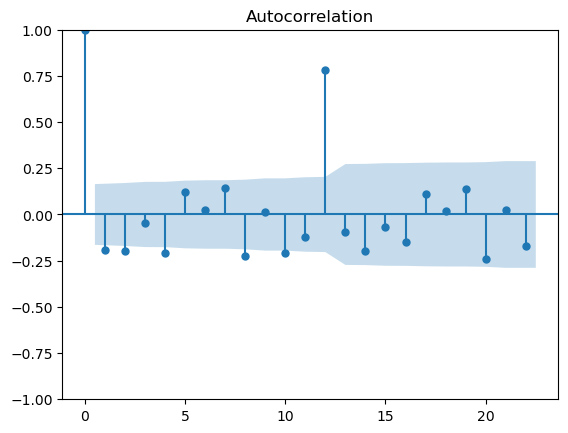

In [27]:
acf= plot_acf(df['Difference_2'].dropna())

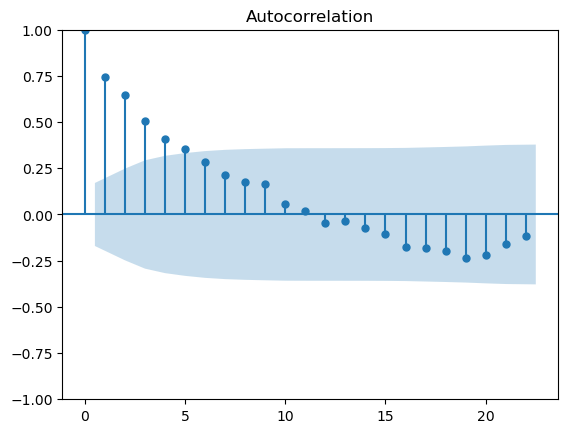

In [34]:
acf12 = plot_acf(df['Difference_12'].dropna())

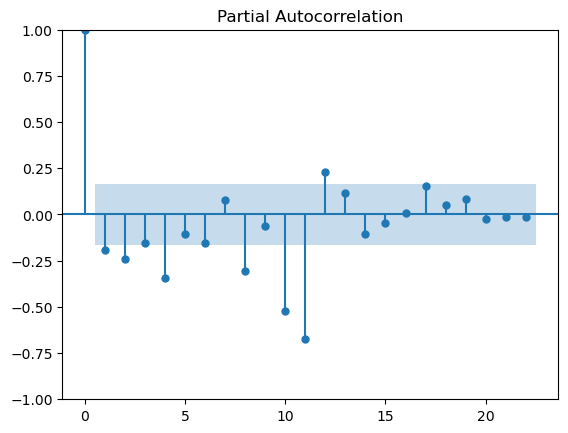

In [33]:
pacf= plot_pacf(df['Difference_2'].dropna(), method = 'ywm')


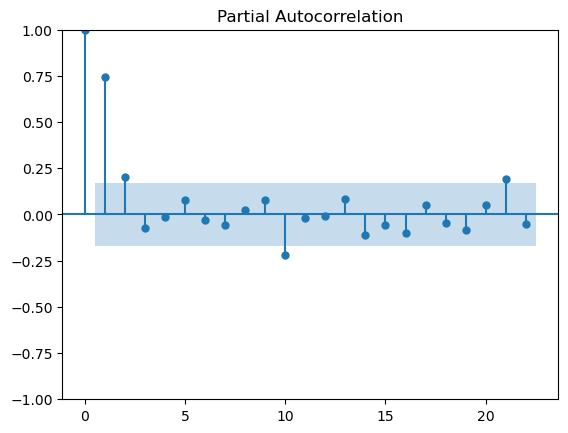

In [35]:
pacf12= plot_pacf(df['Difference_12'].dropna(), method = 'ywm')

In [37]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [40]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days = 1):test_dataset_end]

In [41]:
perd_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [42]:
test_data

,Thousands of Passengers,Difference_1,Difference_2,Difference_12
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0
